In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from numpy import mean
from numpy import std
from numpy import absolute
from libpysal.weights.contiguity import Queen
import libpysal
from statsmodels.api import OLS
sns.set_style('white')

In [4]:
import os
os.getcwd()

'C:\\Users\\SarShel\\EnvDatSci\\Sprints\\EnvDatSci2021\\CodeSprints\\DEC Project'

In [5]:
os.chdir('C:\\Users\\SarShel\\DECproject\\Regression')
os.getcwd()

'C:\\Users\\SarShel\\DECproject\\Regression'

In [6]:
# Read S2 dataset 
Data1 = pd.read_csv('data_raw/Indices/S2Data.csv')

# Remove none values
S2Data = Data1.dropna()

# Display the first few rows of our DataFrame
S2Data.head()
print(S2Data)

       Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0      2016      5    7  0.956879 -0.044137 -0.022070  0.117900  0.002955   
1      2016      5    7  0.956959 -0.043948 -0.022029  0.117907  0.002955   
2      2016      5    7  1.015101  0.016830  0.007469  0.147959  0.008728   
3      2016      5    7  0.991688 -0.008969 -0.004225  0.142645  0.007528   
4      2016      5    7  0.881265 -0.110070 -0.063161  0.116655  0.002038   
...     ...    ...  ...       ...       ...       ...       ...       ...   
35028  2020     10   30  0.854190 -0.129064 -0.078726  0.152807  0.001676   
35029  2020     10   30  1.077379  0.065607  0.035775  0.126659  0.001469   
35030  2020     10   30  0.946243 -0.050380 -0.027911  0.134852  0.007321   
35031  2020     10   30  0.962221 -0.039201 -0.019493  0.132445  0.007393   
35032  2020     10   30  0.960195 -0.038782 -0.020508  0.126638  0.006003   

            B11       B12  ...        B3        B4        B5        B6  \
0

In [7]:
# Read Field dataset 
Data2 = pd.read_csv('data_raw/Indices/FieldData.csv')

# Remove none values
FieldData = Data2.dropna()

# Display the first few rows of our DataFrame
#FieldData.head()
print(FieldData)

             Lake Name          Y          X       Date  Year  Month  Day  \
0     Little Long Pond  40.977600 -72.296204   6/4/2016  2016      6    4   
1       Cossayuna Lake  43.200600 -73.423401   6/3/2016  2016      6    3   
2           Hatch Lake  42.834598 -75.677803   6/5/2016  2016      6    5   
3      Montgomery Lake  41.525299 -74.917297   6/4/2016  2016      6    4   
4        Lake Devenoge  41.521000 -74.839401   6/4/2016  2016      6    4   
...                ...        ...        ...        ...   ...    ...  ...   
6070         Long Pond  40.975102 -72.290802  7/26/2020  2020      7   26   
6071         Long Pond  40.975102 -72.290802   8/9/2020  2020      8    9   
6072         Long Pond  40.975102 -72.290802  8/23/2020  2020      8   23   
6073         Long Pond  40.975102 -72.290802   9/7/2020  2020      9    7   
6074         Long Pond  40.975102 -72.290802  9/20/2020  2020      9   20   

       Chl-a  
0      1.200  
1      0.600  
2      2.900  
3      2.900  


In [8]:
# Using merge function by setting how='inner'
MergedData = pd.merge(S2Data, FieldData, on=['Y', 'X', 'Year', 'Month', 'Day'], how='inner')
MergedData.to_csv('data_output/Indices/MergedData.csv')
  
# displaying result
print(MergedData)

      Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
1     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
2     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
3     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
4     2016      6   10  0.975644 -0.026771 -0.012388  0.116193  0.001103   
...    ...    ...  ...       ...       ...       ...       ...       ...   
1482  2020      9   24  1.006182  0.007508  0.003046  0.136534  0.007655   
1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810  0.001697   
1484  2020      9   27  0.948135 -0.054520 -0.026673  0.270976  0.003162   
1485  2020      9   30  0.906324 -0.089171 -0.049167  0.135859  0.001359   
1486  2020      9   30  1.060907  0.070528  0.027154  0.190724  0.001834   

           B11       B12  ...        B6        B7        B8       B8A  \
0     0.012669

In [9]:
# Descriptive statistics of all variables
list = ['2BDA', '3BDA', 'NDCI', 'Chl-a']
MergedData [list].describe()

,2BDA,3BDA,NDCI,Chl-a
count,1487.000000,1487.000000,1487.000000,1487.000000
mean,0.995474,0.015297,-0.005038,10.526351
std,0.132150,0.191915,0.054806,18.258538
min,0.406412,-0.183174,-0.113502,0.050000
25%,0.916918,-0.093031,-0.042380,1.900000
50%,0.966684,-0.035932,-0.016578,3.900000
75%,1.048701,0.067505,0.023032,9.992000
max,2.165665,2.150818,0.368135,166.300000


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


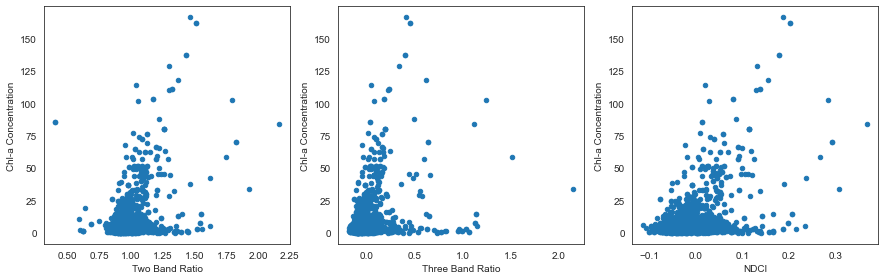

0.4000614611071748 0.28917515561718177 0.44219761482571174


In [10]:
# Scatterplot for Chl-a vs all variables

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData[['2BDA','Chl-a']].plot.scatter('2BDA','Chl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Chl-a Concentration')
r1 = np.corrcoef(MergedData['2BDA'].values, MergedData['Chl-a'].values)[0,1]

MergedData[['3BDA','Chl-a']].plot.scatter('3BDA','Chl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Chl-a Concentration')
r2 = np.corrcoef(MergedData['3BDA'].values, MergedData['Chl-a'].values)[0,1]

MergedData[['NDCI','Chl-a']].plot.scatter('NDCI','Chl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Chl-a Concentration')
r3 = np.corrcoef(MergedData['NDCI'].values, MergedData['Chl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [15]:
# Return the natural logarithm of Chl-a (Y), 2BDA, 3BDA, NDCI
MergedData['LnChl-a']=np.log(MergedData['Chl-a'])
MergedData['Ln2BDA']=np.log(MergedData['2BDA'])
MergedData['Ln3BDA']=np.log(MergedData['3BDA'])
MergedData['LnNDCI']=np.log(MergedData['NDCI'])
print(MergedData)

      Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
1     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
2     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
3     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
4     2016      6   10  0.975644 -0.026771 -0.012388  0.116193  0.001103   
...    ...    ...  ...       ...       ...       ...       ...       ...   
1482  2020      9   24  1.006182  0.007508  0.003046  0.136534  0.007655   
1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810  0.001697   
1484  2020      9   27  0.948135 -0.054520 -0.026673  0.270976  0.003162   
1485  2020      9   30  0.906324 -0.089171 -0.049167  0.135859  0.001359   
1486  2020      9   30  1.060907  0.070528  0.027154  0.190724  0.001834   

           B11       B12  ...        B9          X          Y  \
0     0.012669  0.0080

C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


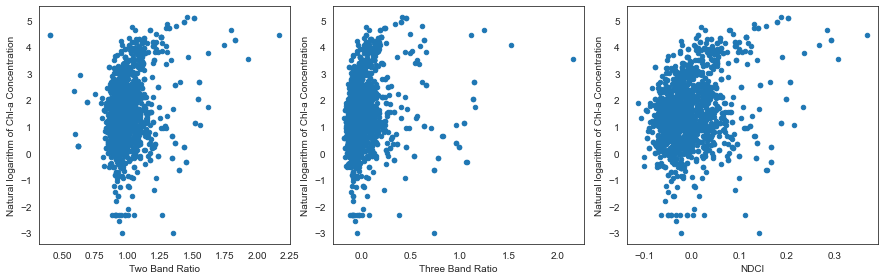

0.26047067970293347 0.18344928162498023 0.2959374649473165


In [13]:
# Scatterplot for Chl-a vs all variables

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData[['2BDA','LnChl-a']].plot.scatter('2BDA','LnChl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Natural logarithm of Chl-a Concentration')
r1 = np.corrcoef(MergedData['2BDA'].values, MergedData['LnChl-a'].values)[0,1]

MergedData[['3BDA','LnChl-a']].plot.scatter('3BDA','LnChl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Natural logarithm of Chl-a Concentration')
r2 = np.corrcoef(MergedData['3BDA'].values, MergedData['LnChl-a'].values)[0,1]

MergedData[['NDCI','LnChl-a']].plot.scatter('NDCI','LnChl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Natural logarithm of Chl-a Concentration')
r3 = np.corrcoef(MergedData['NDCI'].values, MergedData['LnChl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


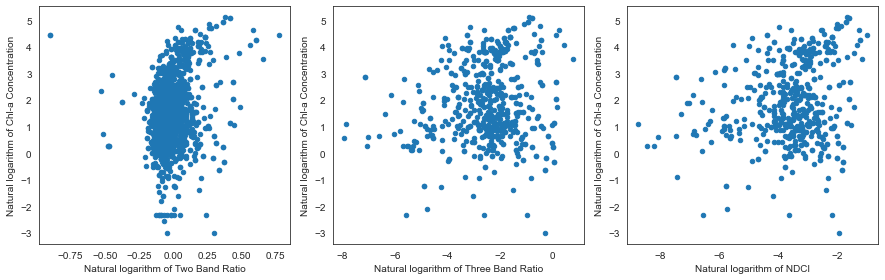

0.24616481209420393 nan nan


In [16]:
f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData[['Ln2BDA','LnChl-a']].plot.scatter('Ln2BDA','LnChl-a', ax=ax[0])
ax[0].set_xlabel('Natural logarithm of Two Band Ratio')
ax[0].set_ylabel('Natural logarithm of Chl-a Concentration')
r1 = np.corrcoef(MergedData['Ln2BDA'].values, MergedData['LnChl-a'].values)[0,1]

MergedData[['Ln3BDA','LnChl-a']].plot.scatter('Ln3BDA','LnChl-a', ax=ax[1])
ax[1].set_xlabel('Natural logarithm of Three Band Ratio')
ax[1].set_ylabel('Natural logarithm of Chl-a Concentration')
r2 = np.corrcoef(MergedData['Ln3BDA'].values, MergedData['LnChl-a'].values)[0,1]

MergedData[['LnNDCI','LnChl-a']].plot.scatter('LnNDCI','LnChl-a', ax=ax[2])
ax[2].set_xlabel('Natural logarithm of NDCI')
ax[2].set_ylabel('Natural logarithm of Chl-a Concentration')
r3 = np.corrcoef(MergedData['LnNDCI'].values, MergedData['LnChl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [155]:
# MergedData: Threshold Chl-a=0.4
MergedData2 = MergedData.loc[(MergedData["Chl-a"] > 0.4)]
MergedData2.shape

(1455, 24)

In [156]:
# Descriptive statistics of all variables: Threshold Chl-a=0.4
list = ['2BDA', '3BDA', 'NDCI', 'Chl-a']
MergedData2 [list].describe()

,2BDA,3BDA,NDCI,Chl-a
count,1455.000000,1455.000000,1455.000000,1455.000000
mean,0.995531,0.015389,-0.004980,10.753637
std,0.132538,0.192103,0.054887,18.393171
min,0.406412,-0.183174,-0.113502,0.403200
25%,0.916918,-0.092965,-0.042233,1.958600
50%,0.967510,-0.035393,-0.016399,4.036000
75%,1.049181,0.067732,0.023215,10.200000
max,2.165665,2.150818,0.368135,166.300000


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


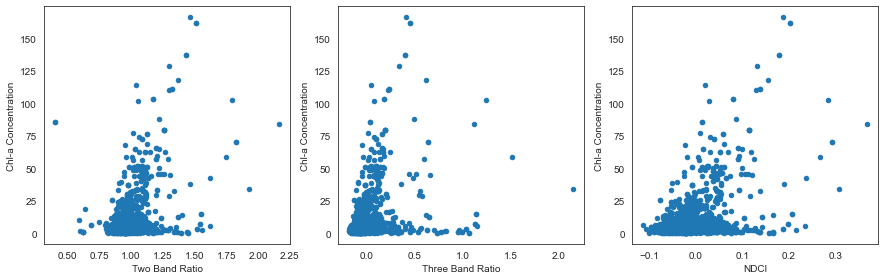

0.4044364056375403 0.2928153245123734 0.4473431786502586


In [157]:
# Scatterplot for Chl-a vs all variables:Threshold Chl-a=0.4

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData2[['2BDA','Chl-a']].plot.scatter('2BDA','Chl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Chl-a Concentration')
r1 = np.corrcoef(MergedData2['2BDA'].values, MergedData2['Chl-a'].values)[0,1]

MergedData2[['3BDA','Chl-a']].plot.scatter('3BDA','Chl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Chl-a Concentration')
r2 = np.corrcoef(MergedData2['3BDA'].values, MergedData2['Chl-a'].values)[0,1]

MergedData2[['NDCI','Chl-a']].plot.scatter('NDCI','Chl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Chl-a Concentration')
r3 = np.corrcoef(MergedData2['NDCI'].values, MergedData2['Chl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [158]:
# MergedData: Threshold Chl-a=5
MergedData3 = MergedData.loc[(MergedData["Chl-a"] > 5)]
MergedData3.shape

(632, 24)

In [159]:
# Descriptive statistics of all variables: Threshold Chl-a=5
list = ['2BDA', '3BDA', 'NDCI', 'Chl-a']
MergedData3 [list].describe()

,2BDA,3BDA,NDCI,Chl-a
count,632.000000,632.000000,632.000000,632.000000
mean,1.018395,0.039804,0.006011,21.664987
std,0.155950,0.209353,0.061463,23.810496
min,0.406412,-0.173009,-0.113502,5.068000
25%,0.930843,-0.074372,-0.034628,7.280500
50%,0.986345,-0.014382,-0.006590,12.013000
75%,1.070076,0.088737,0.033390,25.795000
max,2.165665,2.150818,0.368135,166.300000


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


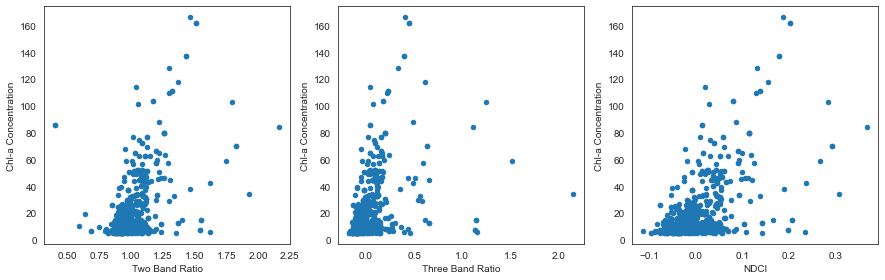

0.4917451236876419 0.3847714021456846 0.5651421314339337


In [160]:
# Scatterplot for Chl-a vs all variables:Threshold Chl-a=5

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData3[['2BDA','Chl-a']].plot.scatter('2BDA','Chl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Chl-a Concentration')
r1 = np.corrcoef(MergedData3['2BDA'].values, MergedData3['Chl-a'].values)[0,1]

MergedData3[['3BDA','Chl-a']].plot.scatter('3BDA','Chl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Chl-a Concentration')
r2 = np.corrcoef(MergedData3['3BDA'].values, MergedData3['Chl-a'].values)[0,1]

MergedData3[['NDCI','Chl-a']].plot.scatter('NDCI','Chl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Chl-a Concentration')
r3 = np.corrcoef(MergedData3['NDCI'].values, MergedData3['Chl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [161]:
# MergedData: Threshold Chl-a=10
MergedData4 = MergedData.loc[(MergedData["Chl-a"] > 10)]
MergedData4.shape

(371, 24)

In [162]:
# Descriptive statistics of all variables: Threshold Chl-a=10
list = ['2BDA', '3BDA', 'NDCI', 'Chl-a']
MergedData4 [list].describe()

,2BDA,3BDA,NDCI,Chl-a
count,371.000000,371.000000,371.000000,371.000000
mean,1.052058,0.076606,0.021675,31.964194
std,0.174003,0.228833,0.065199,26.606865
min,0.406412,-0.141255,-0.084683,10.038000
25%,0.958290,-0.042639,-0.020401,13.890000
50%,1.018622,0.024161,0.009109,21.700000
75%,1.095249,0.114246,0.045131,43.500000
max,2.165665,2.150818,0.368135,166.300000


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


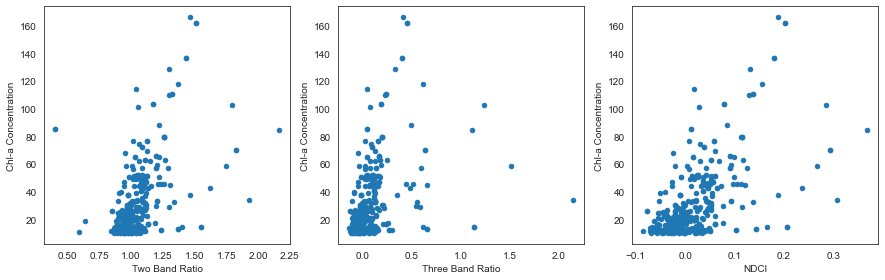

0.487873590587738 0.3824001403082351 0.5824387482361708


In [163]:
# Scatterplot for Chl-a vs all variables:Threshold Chl-a=10

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData4[['2BDA','Chl-a']].plot.scatter('2BDA','Chl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Chl-a Concentration')
r1 = np.corrcoef(MergedData4['2BDA'].values, MergedData4['Chl-a'].values)[0,1]

MergedData4[['3BDA','Chl-a']].plot.scatter('3BDA','Chl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Chl-a Concentration')
r2 = np.corrcoef(MergedData4['3BDA'].values, MergedData4['Chl-a'].values)[0,1]

MergedData4[['NDCI','Chl-a']].plot.scatter('NDCI','Chl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Chl-a Concentration')
r3 = np.corrcoef(MergedData4['NDCI'].values, MergedData4['Chl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [164]:
# MergedData: Threshold Chl-a=15
MergedData5 = MergedData.loc[(MergedData["Chl-a"] > 15)]
MergedData5.shape

(263, 24)

In [165]:
# Descriptive statistics of all variables: Threshold Chl-a=15
list = ['2BDA', '3BDA', 'NDCI', 'Chl-a']
MergedData5 [list].describe()

,2BDA,3BDA,NDCI,Chl-a
count,263.000000,263.000000,263.000000,263.000000
mean,1.070563,0.093575,0.030373,40.127802
std,0.186278,0.235939,0.067864,27.733767
min,0.406412,-0.135845,-0.078095,15.060000
25%,0.973639,-0.020724,-0.010553,20.620000
50%,1.036768,0.038963,0.017265,30.140000
75%,1.112373,0.126308,0.052173,50.300000
max,2.165665,2.150818,0.368135,166.300000


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


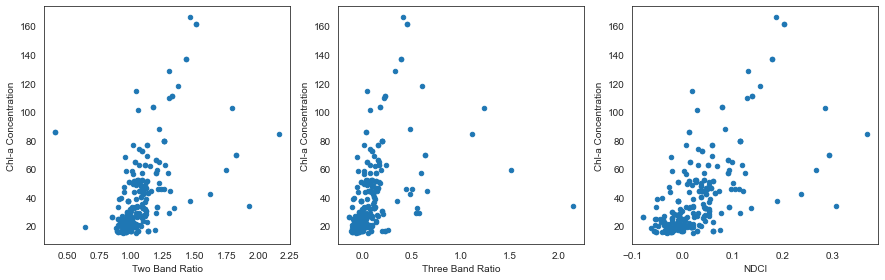

0.5133972587341751 0.4249963102433628 0.6252614001212314


In [166]:
# Scatterplot for Chl-a vs all variables:Threshold Chl-a=15

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData5[['2BDA','Chl-a']].plot.scatter('2BDA','Chl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Chl-a Concentration')
r1 = np.corrcoef(MergedData5['2BDA'].values, MergedData5['Chl-a'].values)[0,1]

MergedData5[['3BDA','Chl-a']].plot.scatter('3BDA','Chl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Chl-a Concentration')
r2 = np.corrcoef(MergedData5['3BDA'].values, MergedData5['Chl-a'].values)[0,1]

MergedData5[['NDCI','Chl-a']].plot.scatter('NDCI','Chl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Chl-a Concentration')
r3 = np.corrcoef(MergedData5['NDCI'].values, MergedData5['Chl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [168]:
# MergedData: Threshold Chl-a=20
MergedData6 = MergedData.loc[(MergedData["Chl-a"] > 20)]
MergedData6.shape

(205, 24)

In [169]:
# Descriptive statistics of all variables: Threshold Chl-a=20
list = ['2BDA', '3BDA', 'NDCI', 'Chl-a']
MergedData6 [list].describe()

,2BDA,3BDA,NDCI,Chl-a
count,205.000000,205.000000,205.000000,205.000000
mean,1.096930,0.122213,0.041685,46.593112
std,0.199346,0.256608,0.071244,28.228859
min,0.406412,-0.135845,-0.078095,20.060000
25%,0.987161,-0.014331,-0.006393,26.060000
50%,1.066638,0.071743,0.031036,38.920000
75%,1.127745,0.146439,0.058011,56.680000
max,2.165665,2.150818,0.368135,166.300000


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


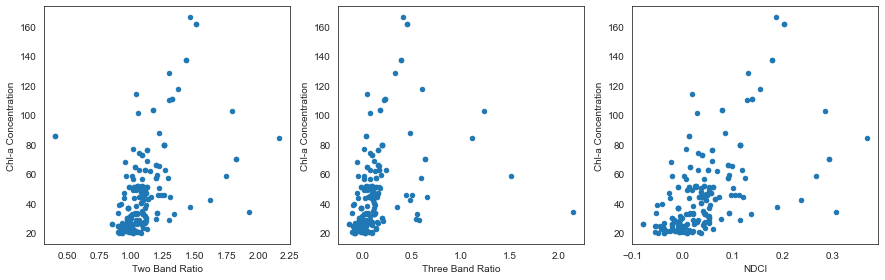

0.4668354450619797 0.37579583985028897 0.5843496586705526


In [170]:
# Scatterplot for Chl-a vs all variables:Threshold Chl-a=20

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData6[['2BDA','Chl-a']].plot.scatter('2BDA','Chl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Chl-a Concentration')
r1 = np.corrcoef(MergedData6['2BDA'].values, MergedData6['Chl-a'].values)[0,1]

MergedData6[['3BDA','Chl-a']].plot.scatter('3BDA','Chl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Chl-a Concentration')
r2 = np.corrcoef(MergedData6['3BDA'].values, MergedData6['Chl-a'].values)[0,1]

MergedData6[['NDCI','Chl-a']].plot.scatter('NDCI','Chl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Chl-a Concentration')
r3 = np.corrcoef(MergedData6['NDCI'].values, MergedData6['Chl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [171]:
# Pearson Coefficient 
MergedData[['2BDA', '3BDA', 'NDCI', 'Chl-a']].corr(method='pearson')

,2BDA,3BDA,NDCI,Chl-a
2BDA,1.000000,0.901674,0.947186,0.400061
3BDA,0.901674,1.000000,0.912430,0.289175
NDCI,0.947186,0.912430,1.000000,0.442198
Chl-a,0.400061,0.289175,0.442198,1.000000


In [172]:
# Getting column names
X_columns = ["2BDA", "3BDA", "NDCI"]
Y = MergedData["Chl-a"]

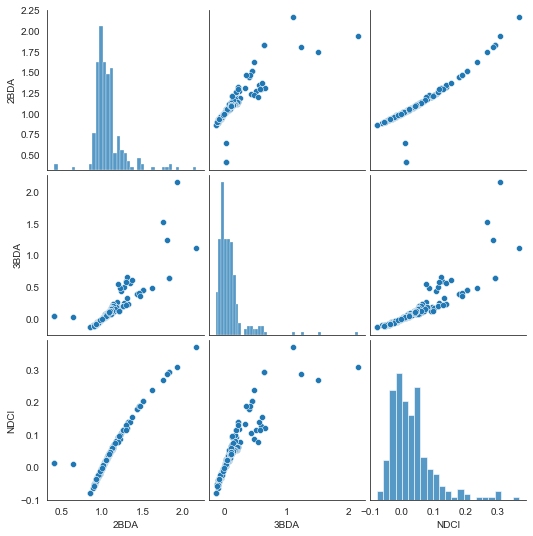

In [173]:
# Use seaborn.pairplot to plot a scatterplot matrix of independent variables (X)
sns.pairplot(MergedData5[X_columns])

In [174]:
?variance_inflation_factor

In [175]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(MergedData5[X_columns[0:3]].values, i) for i in range(MergedData5[X_columns[0:3]].shape[1])]
vif["features"] = MergedData5[X_columns[0:3]].columns

In [176]:
vif.round()

,VIF Factor,features
0,1.0,2BDA
1,5.0,3BDA
2,5.0,NDCI


In [177]:
#OLS model based on Three predictors (2BDA,3BDA,NDCI)
# Extract independent variables (predictors) 
X = MergedData[X_columns]

# Extract dependent variable (prediction)
Y = MergedData['Chl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Chl-a   R-squared (uncentered):                   0.455
Model:                            OLS   Adj. R-squared (uncentered):              0.454
Method:                 Least Squares   F-statistic:                              413.3
Date:                Mon, 24 Jan 2022   Prob (F-statistic):                   4.14e-195
Time:                        11:03:13   Log-Likelihood:                         -6190.6
No. Observations:                1487   AIC:                                  1.239e+04
Df Residuals:                    1484   BIC:                                  1.240e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [182]:
X = MergedData[X_columns]
Y = MergedData['Chl-a']

model = OLS(Y, X)
results = OLS(Y, X).fit()

# prediction
MergedData['Yhat1'] = results.predict(X)
print('predicted Y:', MergedData['Yhat1'])
print('original Y:', Y)

predicted Y: 0        7.679165
1        7.679165
2        9.722356
3        9.722356
4       10.641788
          ...    
1482    13.859161
1483    11.806257
1484     7.407628
1485     1.729101
1486    18.343923
Name: Yhat1, Length: 1487, dtype: float64
original Y: 0       8.1000
1       8.1000
2       0.7000
3       0.7000
4       4.0000
         ...  
1482    0.2898
1483    2.8560
1484    7.3620
1485    3.4640
1486    3.2140
Name: Chl-a, Length: 1487, dtype: float64


In [183]:
mae = metrics.mean_absolute_error(Y, MergedData['Yhat1'])
print("MAE:",mae)

MAE: 10.218305113125215


In [184]:
#OLS model based on NDCI as a predictor 
# Extract independent variables (predictors) 
X = MergedData['NDCI']

# Extract dependent variable (prediction)
Y = MergedData['Chl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Chl-a   R-squared (uncentered):                   0.113
Model:                            OLS   Adj. R-squared (uncentered):              0.112
Method:                 Least Squares   F-statistic:                              188.7
Date:                Mon, 24 Jan 2022   Prob (F-statistic):                    1.60e-40
Time:                        11:05:32   Log-Likelihood:                         -6553.2
No. Observations:                1487   AIC:                                  1.311e+04
Df Residuals:                    1486   BIC:                                  1.311e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [185]:
X = MergedData['NDCI']
Y = MergedData['Chl-a']

model = OLS(Y, X)
results = OLS(Y, X).fit()

# prediction
MergedData['Yhat2'] = results.predict(X)
print('predicted Y:', MergedData['Yhat2'])
print('original Y:', Y)

predicted Y: 0      -3.195579
1      -3.195579
2      -2.991004
3      -2.991004
4      -1.592650
          ...   
1482    0.391553
1483   -0.944788
1484   -3.429161
1485   -6.321152
1486    3.491012
Name: Yhat2, Length: 1487, dtype: float64
original Y: 0       8.1000
1       8.1000
2       0.7000
3       0.7000
4       4.0000
         ...  
1482    0.2898
1483    2.8560
1484    7.3620
1485    3.4640
1486    3.2140
Name: Chl-a, Length: 1487, dtype: float64


In [186]:
mae = metrics.mean_absolute_error(Y, MergedData['Yhat2'])
print("MAE:",mae)

MAE: 12.672421964177627


In [187]:
#OLS model based on 2BDA as a predictor 
# Extract independent variables (predictors) 
X = MergedData['2BDA']

# Extract dependent variable (prediction)
Y = MergedData['Chl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Chl-a   R-squared (uncentered):                   0.293
Model:                            OLS   Adj. R-squared (uncentered):              0.292
Method:                 Least Squares   F-statistic:                              614.4
Date:                Mon, 24 Jan 2022   Prob (F-statistic):                   8.48e-114
Time:                        11:05:57   Log-Likelihood:                         -6384.9
No. Observations:                1487   AIC:                                  1.277e+04
Df Residuals:                    1486   BIC:                                  1.278e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [188]:
X = MergedData['2BDA']
Y = MergedData['Chl-a']

model = OLS(Y, X)
results = OLS(Y, X).fit()

# prediction
MergedData['Yhat3'] = results.predict(X)
print('predicted Y:', MergedData['Yhat3'])
print('original Y:', Y)

predicted Y: 0       10.800127
1       10.800127
2       10.836517
3       10.836517
4       11.071406
          ...    
1482    11.417954
1483    11.183321
1484    10.759247
1485    10.284784
1486    12.038962
Name: Yhat3, Length: 1487, dtype: float64
original Y: 0       8.1000
1       8.1000
2       0.7000
3       0.7000
4       4.0000
         ...  
1482    0.2898
1483    2.8560
1484    7.3620
1485    3.4640
1486    3.2140
Name: Chl-a, Length: 1487, dtype: float64


In [189]:
mae = metrics.mean_absolute_error(Y, MergedData['Yhat3'])
print("MAE:",mae)

MAE: 10.827971583652227


In [190]:
MergedData.to_csv('data_output/Indices/MergedData.csv')